# TP 2:  Panorama des méthodes de fouille de données


L'objectif de cette séance est de passer en revue les diérents types de méthodes utilisées en
fouille de données, que ce soit en analyse exploratoire ou en analyse prédictive.

# 1 Analyse exploratoire


## 1.1 Classification / Clustering


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Turn interactive plotting off
plt.ioff()

# # read input text and put data inside a data frame
covid = pd.read_csv("data/covid19.v2.csv")
covid.head()


,country,country_code,population,vaccine_2021-winter,vaccine_2021-spring,vaccine_2021-summer,vaccine_2021-fall,vaccine_2022-winter,testing_rate_2020,testing_rate_2021,deaths_rate-2020-spring,deaths_rate-2020-summer,deaths_rate-2020-fall,deaths_rate-2021-winter,deaths_rate-2021-spring,deaths_rate-2021-summer,deaths_rate-2021-fall,deaths_rate-2022-winter
0,Austria,AT,8901064,711326,5070308,4528419,3686962,2744560,902.69,32690.31,11.978,1.167,42.830,89.894,31.633,2.748,31.872,31.218
1,Belgium,BE,11522440,870773,6802244,7639306,2677905,4549303,1314.77,3192.26,123.405,7.671,86.533,76.306,34.566,4.847,22.805,36.125
2,Bulgaria,BG,6951482,212445,1251970,877732,1026556,818245,489.46,1553.12,2.988,9.738,59.965,148.690,158.897,25.650,210.912,160.200
3,Croatia,HR,4058165,243767,1770881,1336909,893535,793016,506.42,2185.70,3.829,2.900,51.368,149.556,90.558,11.278,100.121,160.387
4,Cyprus,CY,888005,75022,564483,436540,232256,305687,1955.11,32100.15,4.331,0.693,6.237,40.021,26.946,29.712,13.773,35.895


### Combien y a-t-il d'attributs ? De quels types sont-ils ?

In [2]:
# Obtenir le nombre d'attributs et leurs types
num_attributes = len(covid.columns)
attribute_types = covid.dtypes

print(f"Nombre d'attributs : {num_attributes}")
print("\nTypes d'attributs :")
print(attribute_types)

Nombre d'attributs : 18

Types d'attributs :
country                     object
country_code                object
population                   int64
vaccine_2021-winter          int64
vaccine_2021-spring          int64
vaccine_2021-summer          int64
vaccine_2021-fall            int64
vaccine_2022-winter          int64
testing_rate_2020          float64
testing_rate_2021          float64
deaths_rate-2020-spring    float64
deaths_rate-2020-summer    float64
deaths_rate-2020-fall      float64
deaths_rate-2021-winter    float64
deaths_rate-2021-spring    float64
deaths_rate-2021-summer    float64
deaths_rate-2021-fall      float64
deaths_rate-2022-winter    float64
dtype: object


### Y a-t-il des valeurs manquantes dans les données ? Comment ces valeurs sont-elles représentées dans le ficher ?


In [3]:
missing_values = covid.isnull().sum()
print("Nombre de valeurs manquantes par attribut :")
print(missing_values)


Nombre de valeurs manquantes par attribut :
country                    0
country_code               0
population                 0
vaccine_2021-winter        0
vaccine_2021-spring        0
vaccine_2021-summer        0
vaccine_2021-fall          0
vaccine_2022-winter        0
testing_rate_2020          0
testing_rate_2021          0
deaths_rate-2020-spring    0
deaths_rate-2020-summer    0
deaths_rate-2020-fall      0
deaths_rate-2021-winter    0
deaths_rate-2021-spring    0
deaths_rate-2021-summer    0
deaths_rate-2021-fall      0
deaths_rate-2022-winter    0
dtype: int64


pas de valeur NAN Alors

### Les nombres de doses injectées dans un pays sont liés à sa population. De façon à avoir des variables qui donnent une idée plus précise de la couverture vaccinale du pays, calculez plutôt le nombre de doses pour 1 000 habitants. Une fois que vous aurez réalisé ce calcul, supprimez la variable correspondant au nombre d'habitants.

In [4]:
# Liste des années de vaccination
annees_vaccination = ["2021-winter", "2021-spring", "2021-summer", "2021-fall", "2022-winter"]

for annee in annees_vaccination:
    # Calculer le nombre de doses pour 1 000 habitants dans la colonne existante
    covid[f'vaccine_{annee}'] = (covid[f'vaccine_{annee}'] / covid["population"]) * 1000

# Supprimer la colonne "population"
covid = covid.drop("population", axis=1)


In [5]:
covid.head()

,country,country_code,vaccine_2021-winter,vaccine_2021-spring,vaccine_2021-summer,vaccine_2021-fall,vaccine_2022-winter,testing_rate_2020,testing_rate_2021,deaths_rate-2020-spring,deaths_rate-2020-summer,deaths_rate-2020-fall,deaths_rate-2021-winter,deaths_rate-2021-spring,deaths_rate-2021-summer,deaths_rate-2021-fall,deaths_rate-2022-winter
0,Austria,AT,79.914716,569.629429,508.750302,414.215874,308.340666,902.69,32690.31,11.978,1.167,42.830,89.894,31.633,2.748,31.872,31.218
1,Belgium,BE,75.571927,590.347531,662.993776,232.407806,394.821149,1314.77,3192.26,123.405,7.671,86.533,76.306,34.566,4.847,22.805,36.125
2,Bulgaria,BG,30.561109,180.101164,126.265450,147.674410,117.707994,489.46,1553.12,2.988,9.738,59.965,148.690,158.897,25.650,210.912,160.200
3,Croatia,HR,60.068282,436.374815,329.436827,220.182028,195.412459,506.42,2185.70,3.829,2.900,51.368,149.556,90.558,11.278,100.121,160.387
4,Cyprus,CY,84.483759,635.675475,491.596331,261.548077,344.240179,1955.11,32100.15,4.331,0.693,6.237,40.021,26.946,29.712,13.773,35.895


Les valeurs dans les colonnes "vaccine" ont été modifiées pour représenter le nombre de doses pour 1 000 habitants, et la colonne "population" a été supprimée. Les données sont prêtes pour la suite de l'analyse

### Il est souvent utile d'appliquer un filtre de normalisation sur tous les attributs avant d'utiliser des méthodes de clustering. Quel est l'effet du filtre StandardScaler sur les données ? 


Le filtre StandardScaler (également connu sous le nom de Standardization) est couramment utilisé pour normaliser les données avant d'appliquer des méthodes de clustering. Son effet sur les données est de les transformer de telle sorte que chaque attribut (caractéristique) ait une moyenne de 0 et un écart-type de 1. Cela signifie que les données sont centrées autour de zéro et ont des écarts types égaux.

Les avantages de l'utilisation de StandardScaler avant le clustering sont les suivants :

    Égalisation d'échelle: Lorsque vous effectuez des opérations de clustering, la distance entre les points de données est souvent utilisée comme mesure de similarité. Si les échelles de différentes caractéristiques varient considérablement, certaines caractéristiques peuvent avoir plus d'influence sur la mesure de distance que d'autres. En standardisant les données, vous égalisez les échelles et traitez toutes les caractéristiques de manière équitable.

    Moyenne zéro et écart-type 1: La standardisation permet de centrer les données autour de zéro, ce qui peut faciliter l'interprétation des résultats du clustering. Un écart-type de 1 signifie que la variabilité des données est conservée tout en les mettant à la même échelle.

    Meilleure convergence: Lorsque vous effectuez des méthodes de clustering qui dépendent de la distance, telles que K-means, une échelle équilibrée peut contribuer à une meilleure convergence de l'algorithme.
    

En résumé, l'effet du filtre StandardScaler sur les données est de rendre les attributs comparables et équilibrés en termes d'échelle, ce qui peut améliorer les performances des méthodes de clustering et simplifier l'interprétation des résultats. Cependant, il est important de noter que la standardisation n'est pas toujours nécessaire, et son application dépend du contexte spécifique et des caractéristiques des données.







### A-t-on besoin ici d'employer ce Filtre sur les données étudiées ?

les échelles des attributs varient considérablement, cela peut affecter la performance des méthodes de clustering, en particulier celles qui dépendent de distances. donc la Standarisation est néccessaire dans ce cas

### Effectuez une analyse en composantes principales (ACP) sur les données à l'aide de la bibliothèque scikit-learn

In [7]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Sélectionner les colonnes numériques
Data = covid.select_dtypes(include=['float64', 'int64'])

# Standardisation des données
scaler = StandardScaler()
Data_scaled = scaler.fit_transform(Data)

# Créez une instance de PCA sans spécifier le nombre de composantes
pca = PCA()

# Appliquez l'ACP aux données
components = pca.fit_transform(Data_scaled)

# Créez un DataFrame pour les composantes principales (ajustez les noms des colonnes si nécessaire)
components_df = pd.DataFrame(data=components, columns=[f'PC{i+1}' for i in range(components.shape[1])])

# Vous pouvez maintenant accéder aux composantes principales et à d'autres attributs de pca

# Affichage de la variance expliquée en fonction du nombre de composantes
# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_variance_ratio = explained_variance_ratio.cumsum()

# plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
# plt.title("Variance expliquée cumulée")
# plt.xlabel("Nombre de composantes principales")
# plt.ylabel("Variance cumulée expliquée")
# plt.grid(True)
# plt.show()

# Vous pouvez maintenant décider combien de composantes principales vous souhaitez conserver en fonction de la variance expliquée

# Par défaut, toutes les composantes principales sont conservées, mais vous pouvez spécifier un nombre si vous le souhaitez


Si on veut garder une Variance Cumulée de 90% donc d'apérs le graphe on doit choisir 8 Composantes Pricipales !

### Joignant au rapport l'affichage des instances étiquetées par le code du pays suivant les facteurs 1 et 2, puis suivant les facteurs 1 et 3 de l'ACP.

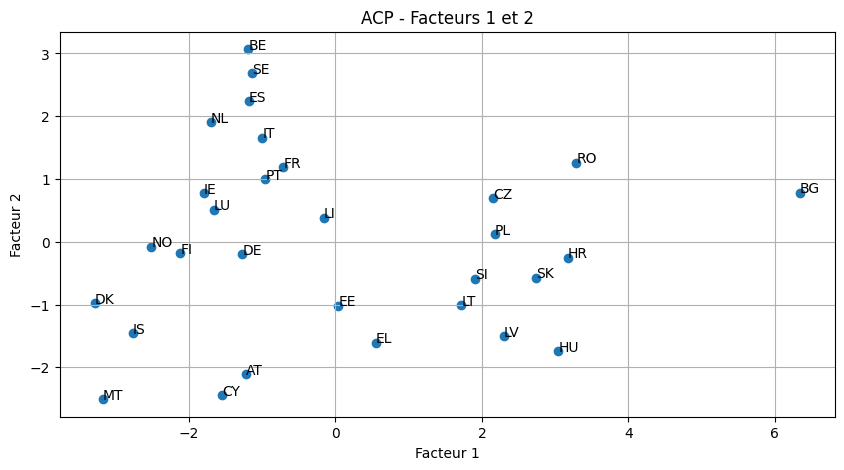

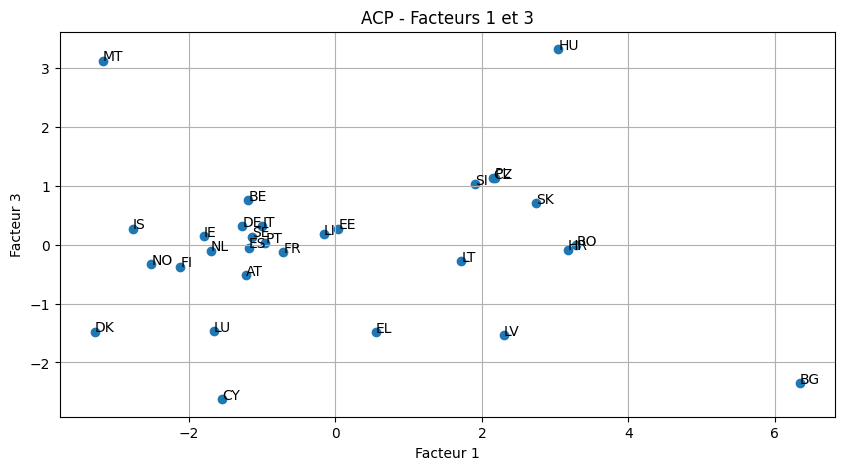

In [11]:
import matplotlib.pyplot as plt

# Supposons que vous ayez effectué l'ACP et que vous ayez déjà les composantes principales dans "components_df"

# Créez un graphique pour les facteurs 1 et 2
plt.figure(figsize=(10, 5))
plt.scatter(components_df['PC1'], components_df['PC2'])

# Étiquetez les points avec le code du pays
for i, country_code in enumerate(covid['country_code']):
    plt.annotate(country_code, (components_df['PC1'][i], components_df['PC2'][i]))

plt.title("ACP - Facteurs 1 et 2")
plt.xlabel("Facteur 1")
plt.ylabel("Facteur 2")
plt.grid(True)
plt.show()

# Répétez le processus pour les facteurs 1 et 3
plt.figure(figsize=(10, 5))
plt.scatter(components_df['PC1'], components_df['PC3'])

# Étiquetez les points avec le code du pays
for i, country_code in enumerate(covid['country_code']):
    plt.annotate(country_code, (components_df['PC1'][i], components_df['PC3'][i]))

plt.title("ACP - Facteurs 1 et 3")
plt.xlabel("Facteur 1")
plt.ylabel("Facteur 3")
plt.grid(True)
plt.show()


### Tracer le graphique de la variance expliquée en fonction du rang du facteur (composante principale) :


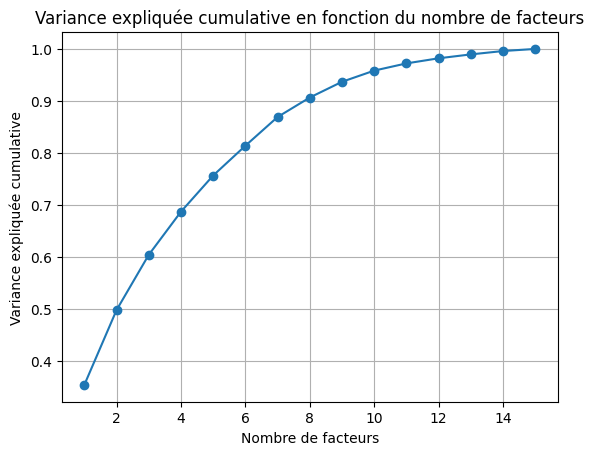

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Calculer les valeurs propres (variance expliquée)
eigenvalues = pca.explained_variance_

# 2. Afficher la variance expliquée cumulative en fonction du nombre de facteurs
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Nombre de facteurs")
plt.ylabel("Variance expliquée cumulative")
plt.title("Variance expliquée cumulative en fonction du nombre de facteurs")
plt.grid(True)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Variance expliquée par chaque composante
# explained_variance = pca.explained_variance_ratio_

# # Créer le graphique de coude (scree plot)
# plt.figure(figsize=(8, 4))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
# plt.title("Variance expliquée en fonction du rang du facteur (Composantes principales)")
# plt.xlabel("Rang du facteur")
# plt.ylabel("Variance expliquée")
# plt.grid(True)
# plt.show()


### Tracer le cercle de corrélation entre les facteurs et les variables originales. Pour cela, on peux utiliser les charges factorielles :

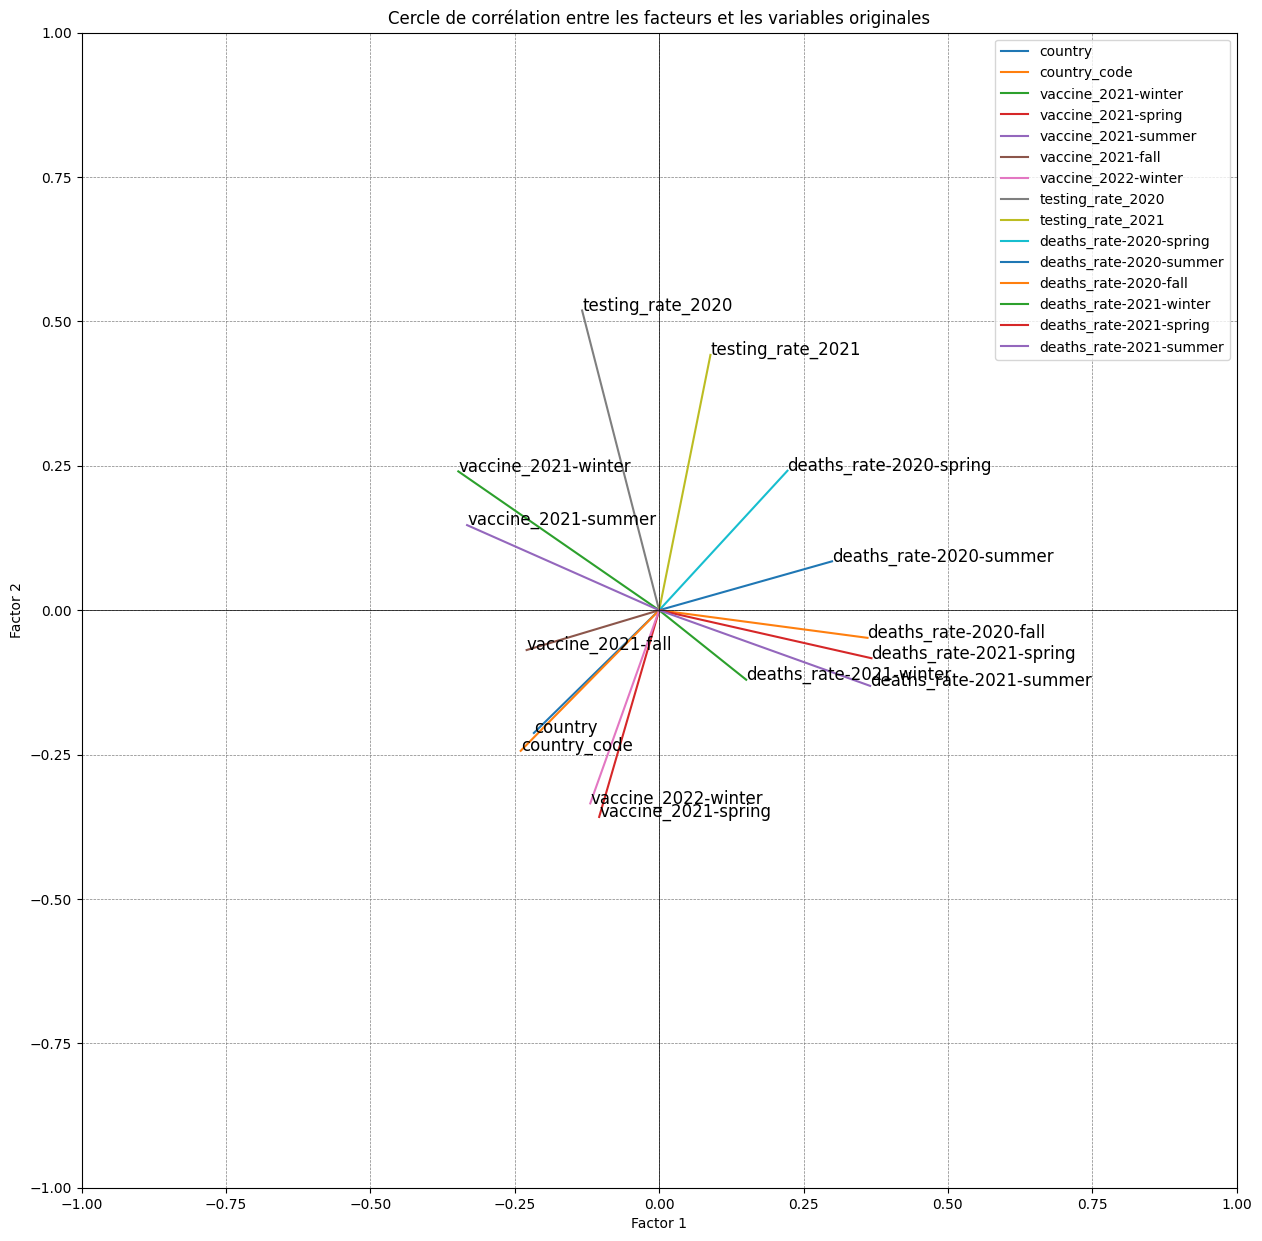

In [13]:
# 3. Tracer le cercle de corrélation
def plot_correlation_circle(pca, variables, axis_labels=None):
    fig, ax = plt.subplots(figsize=(15, 15))
    if not axis_labels:
        axis_labels = [f"Factor {i}" for i in range(1, len(pca.components_) + 1)]
    for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.plot([0, x], [0, y], label=variables[i])
        ax.text(x, y, variables[i], fontsize=12)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel(axis_labels[0])
    ax.set_ylabel(axis_labels[1])
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    ax.legend()

# Les noms de variables correspondent à vos colonnes d'attributs
variables = list(covid.columns)

# Afficher le cercle de corrélation
plot_correlation_circle(pca, variables)
plt.title("Cercle de corrélation entre les facteurs et les variables originales")
plt.show()

In [ ]:
# # Les charges factorielles représentent la corrélation entre les variables originales et les composantes principales
# loadings = pca.components_

# # Tracer le cercle de corrélation
# plt.figure(figsize=(8, 8))
# for i, (ex, ey) in enumerate(zip(loadings[0, :], loadings[1, :])):
#     plt.arrow(0, 0, ex, ey, color='b', alpha=0.5)
#     if abs(ex) > 0.2 or abs(ey) > 0.2:
#         plt.text(ex * 1.15, ey * 1.15, X.columns[i], color='r', ha='center', va='center')
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
# plt.title("Cercle de corrélation")
# plt.xlabel("Composante principale 1")
# plt.ylabel("Composante principale 2")
# plt.grid(True)
# plt.show()


### 6- Clustering avec la méthode des k-moyennes

In [ ]:
covid.head()

In [14]:
# Importez les bibliothèques nécessaires
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Chargez les données d'origine
# data = pd.read_csv("votre_fichier_de_données.csv")  # Remplacez par le chemin de votre fichier
data = covid.drop(columns=["country", "country_code"])

# Choisissez un nombre k de clusters
k = 5  # Choisissez un nombre approprié en fonction de vos besoins

# Standardisez les données si nécessaire
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Standardisation des données

# Appliquez K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Ajoutez les informations sur les clusters à votre dataframe d'origine
data["Cluster"] = clusters

C:\Users\samir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


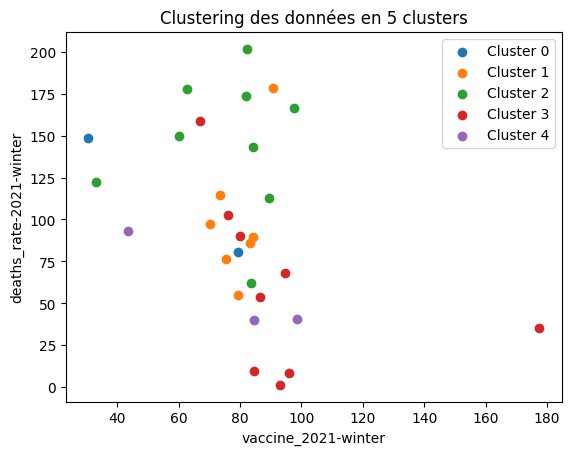

In [15]:
# Visualisez les résultats du clustering
for cluster in range(k):
    cluster_data = data[data["Cluster"] == cluster]
    plt.scatter(cluster_data["vaccine_2021-winter"], cluster_data["deaths_rate-2021-winter"], label=f'Cluster {cluster}')

plt.xlabel("vaccine_2021-winter")
plt.ylabel("deaths_rate-2021-winter")
plt.title(f"Clustering des données en {k} clusters")
plt.legend()
plt.show()

In [16]:
# Afficher les résultats du clustering
data["Cluster"]


0     3
1     1
2     0
3     2
4     4
5     2
6     4
7     3
8     3
9     1
10    3
11    2
12    2
13    3
14    3
15    1
16    2
17    3
18    2
19    4
20    3
21    1
22    3
23    2
24    1
25    0
26    2
27    2
28    1
29    1
Name: Cluster, dtype: int32

### Tracez la variation du R2 pour k variant de 2 à 20

### Autre Methode (l'inertie)

C:\Users\samir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\samir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

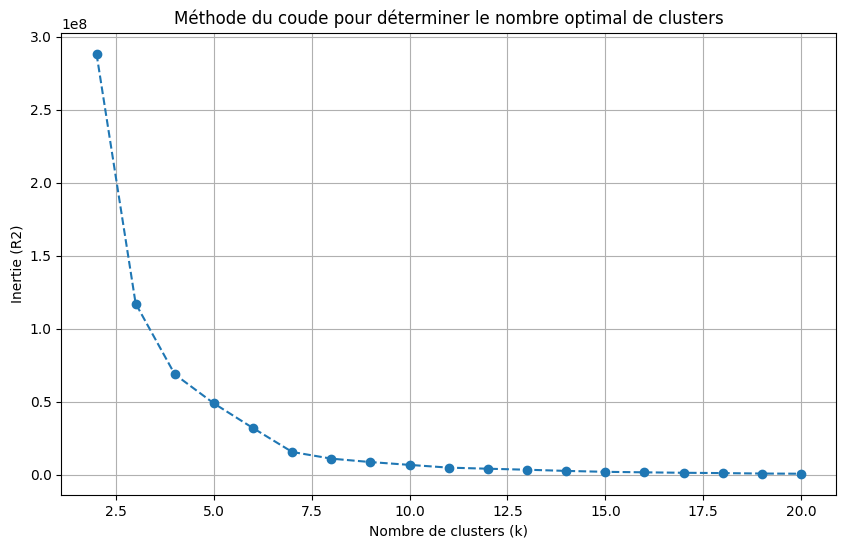

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sélection des données d'origine (sans ACP)
X_original = covid.drop(columns=["country", "country_code"])

# Créer une liste pour stocker les valeurs de R2
inertia = []

# Tester différents nombres de clusters (k de 2 à 20)
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_original)
    inertia.append(kmeans.inertia_)

# Tracer la variation de R2 en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (R2)')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid(True)
plt.show()


### En fixant k à 8, commentez les profils des groupes contenant la France, le Danemark et la Bulgarie

In [21]:
# Sélection des données d'origine (sans ACP)
new_data = data.copy()
new_data = new_data.drop("Cluster",axis=1)
new_data.head()

,vaccine_2021-winter,vaccine_2021-spring,vaccine_2021-summer,vaccine_2021-fall,vaccine_2022-winter,testing_rate_2020,testing_rate_2021,deaths_rate-2020-spring,deaths_rate-2020-summer,deaths_rate-2020-fall,deaths_rate-2021-winter,deaths_rate-2021-spring,deaths_rate-2021-summer,deaths_rate-2021-fall,deaths_rate-2022-winter
0,79.914716,569.629429,508.750302,414.215874,308.340666,902.69,32690.31,11.978,1.167,42.830,89.894,31.633,2.748,31.872,31.218
1,75.571927,590.347531,662.993776,232.407806,394.821149,1314.77,3192.26,123.405,7.671,86.533,76.306,34.566,4.847,22.805,36.125
2,30.561109,180.101164,126.265450,147.674410,117.707994,489.46,1553.12,2.988,9.738,59.965,148.690,158.897,25.650,210.912,160.200
3,60.068282,436.374815,329.436827,220.182028,195.412459,506.42,2185.70,3.829,2.900,51.368,149.556,90.558,11.278,100.121,160.387
4,84.483759,635.675475,491.596331,261.548077,344.240179,1955.11,32100.15,4.331,0.693,6.237,40.021,26.946,29.712,13.773,35.895


In [27]:
from sklearn.cluster import KMeans


# Nombre de clusters souhaité (k)
k = 8

# Appliquer K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
new_data["cluster"] = kmeans.fit_predict(new_data)

# Afficher les résultats du clustering
new_data["cluster"]


C:\Users\samir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0     4
1     3
2     0
3     0
4     4
5     5
6     1
7     3
8     0
9     3
10    0
11    2
12    0
13    7
14    3
15    3
16    3
17    3
18    3
19    6
20    7
21    3
22    3
23    0
24    3
25    0
26    3
27    5
28    0
29    0
Name: cluster, dtype: int32

In [33]:
from sklearn.cluster import KMeans



cluster_labels = new_data["cluster"]

# Créez un DataFrame avec les pays et leurs clusters
clustered_data = pd.DataFrame({'Country': covid['country'], 'Cluster': cluster_labels})

# Déterminez le cluster de la France, du Danemark et de la Bulgarie
france_cluster   = clustered_data[clustered_data['Country'] == 'France']['Cluster'].values[0]
denmark_cluster  = clustered_data[clustered_data['Country'] == 'Denmark']['Cluster'].values[0]
bulgaria_cluster = clustered_data[clustered_data['Country'] == 'Bulgaria']['Cluster'].values[0]
print('france cluster: ',france_cluster)
print('\nDenmark cluster: ',denmark_cluster)
print('\nBulgaria cluster: ' ,bulgaria_cluster,'\n')

# Identifiez les pays du même cluster que la France, le Danemark et la Bulgarie
france_similar = clustered_data[clustered_data['Cluster'] == france_cluster]['Country'].tolist()
denmark_similar = clustered_data[clustered_data['Cluster'] == denmark_cluster]['Country'].tolist()
bulgaria_similar = clustered_data[clustered_data['Cluster'] == bulgaria_cluster]['Country'].tolist()

# Affichez les résultats
print("Pays du même cluster que la France:")
print(france_similar)

print("Pays du même cluster que le Danemark:")
print(denmark_similar)

print("Pays du même cluster que la Bulgarie:")
print(bulgaria_similar)


france cluster:  3

Denmark cluster:  1

Bulgaria cluster:  0 

Pays du même cluster que la France:
['Belgium', 'Estonia', 'France', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Netherlands', 'Norway', 'Portugal', 'Slovakia']
Pays du même cluster que le Danemark:
['Denmark']
Pays du même cluster que la Bulgarie:
['Bulgaria', 'Croatia', 'Finland', 'Germany', 'Hungary', 'Poland', 'Romania', 'Spain', 'Sweden']


In [42]:
import pandas as pd

# Groupez les données par cluster
cluster_groups = new_data.groupby('cluster')

# Sélectionnez les clusters que vous voulez (0, 1, 3) en utilisant .get_group()
selected_clusters = [0, 1, 3]

# Pour chaque cluster sélectionné, calculez la moyenne ou les statistiques que vous souhaitez décrire
for cluster in selected_clusters:
    if cluster in cluster_groups.groups:
        cluster_data = cluster_groups.get_group(cluster)
        cluster_description = cluster_data.mean()  # Par exemple, en utilisant la moyenne
        
        # Imprimez les descriptions de chaque cluster
        print(f"Cluster {cluster}:")
        print(cluster_description)
        print("\n")
    else:
        print(f"Cluster {cluster} n'existe pas dans les données.")


Cluster 0:
vaccine_2021-winter          76.106085
vaccine_2021-spring         489.857452
vaccine_2021-summer         407.203644
vaccine_2021-fall           228.103141
vaccine_2022-winter         241.454082
testing_rate_2020           701.288889
testing_rate_2021          1588.733333
deaths_rate-2020-spring      23.837333
deaths_rate-2020-summer       7.064889
deaths_rate-2020-fall        42.496000
deaths_rate-2021-winter     105.112222
deaths_rate-2021-spring      80.687667
deaths_rate-2021-summer       8.268222
deaths_rate-2021-fall        72.975000
deaths_rate-2022-winter      81.435333
cluster                       0.000000
dtype: float64


Cluster 1:
vaccine_2021-winter           98.573134
vaccine_2021-spring          533.186908
vaccine_2021-summer          757.946872
vaccine_2021-fall            215.124160
vaccine_2022-winter          466.937947
testing_rate_2020           3215.000000
testing_rate_2021          27700.480000
deaths_rate-2020-spring        4.677000
deaths_rate-2020-

## 1.2 Recherche de règles d'association


### Ouvrez les données à l'aide de la bibliothèque pandas. 

In [9]:
import pandas as pd

# Charger les données
supermarket = pd.read_csv("supermarket.csv")
supermarket.tail()

,department1,department2,department3,department4,department5,department6,department7,department8,department9,grocery misc,...,department208,department209,department210,department211,department212,department213,department214,department215,department216,total
4622,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,low
4623,?,?,?,t,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,high
4624,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,low
4625,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,low
4626,t,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,high


In [10]:
supermarket['total'].unique()

array(['high', 'low'], dtype=object)

In [11]:
# pd.set_option('display.max_columns', None)

columns = supermarket.columns.tolist()
for column in columns:
    print(column)

department1
department2
department3
department4
department5
department6
department7
department8
department9
grocery misc
department11
baby needs
bread and cake
baking needs
coupons
juice-sat-cord-ms
tea
biscuits
canned fish-meat
canned fruit
canned vegetables
breakfast food
cigs-tobacco pkts
cigarette cartons
cleaners-polishers
coffee
sauces-gravy-pkle
confectionary
puddings-deserts
dishcloths-scour
deod-disinfectant
frozen foods
razor blades
fuels-garden aids
spices
jams-spreads
insecticides
pet foods
laundry needs
party snack foods
tissues-paper prd
wrapping
dried vegetables
pkt-canned soup
soft drinks
health food other
beverages hot
health&beauty misc
deodorants-soap
mens toiletries
medicines
haircare
dental needs
lotions-creams
sanitary pads
cough-cold-pain
department57
meat misc
cheese
chickens
milk-cream
cold-meats
deli gourmet
margarine
salads
small goods
dairy foods
fruit drinks
delicatessen misc
department70
beef
hogget
lamb
pet food
pork
poultry
veal
gourmet meat
department79

### Quels sont les types des attributs ? 

In [12]:
print(supermarket.dtypes)

department1      object
department2      object
department3      object
department4      object
department5      object
                  ...  
department213    object
department214    object
department215    object
department216    object
total            object
Length: 217, dtype: object


In [13]:
print(supermarket.dtypes.unique())

[dtype('O')]


### Que représentent les valeurs associées aux ?

 ### Comment agit les commandes du fichier squelette, permettant la discrétisation ?

In [14]:
# convert categorical values into one-hot vectors
def one_hot_encode(x):
    if x == '?':
        return False
    elif x == 't':
        return True
    else:
        raise ValueError
def one_hot_encode_total(x):
    if x == 'high':
        return False
    elif x == 'low':
        return True
    else:
        raise ValueError
         
        
supermarket_one_hot = supermarket.drop(['total'], axis=1).applymap(one_hot_encode)

for val in supermarket['total'].unique():
    print(val)
    supermarket_one_hot['total_'+str(val)] = supermarket['total'].apply(lambda x: x==val)
    
supermarket_one_hot.head()


high
low


,department1,department2,department3,department4,department5,department6,department7,department8,department9,grocery misc,...,department209,department210,department211,department212,department213,department214,department215,department216,total_high,total_low
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [26]:
# one_hot_columns = supermarket_one_hot.columns.tolist()
# for column in one_hot_columns:
#     print(supermarket_one_hot[column].unique())

###  Établissez l'ensemble des itemsets fréquents à l'aide de la fonction apriori() de mlxtend en fixant un support minimal à 0,1.


In [21]:
# !pip install mlxtend

In [27]:
from mlxtend.frequent_patterns import apriori

# Exécutez Apriori pour trouver les itemsets fréquents avec un support minimal de 0,1
frequent_itemsets = apriori(supermarket_one_hot, min_support=0.1, use_colnames=True)

# Affichez les itemsets fréquents
print(frequent_itemsets)


        support                                           itemsets
0      0.226281                                      (department1)
1      0.133780                                       (baby needs)
2      0.719689                                   (bread and cake)
3      0.604063                                     (baking needs)
4      0.532310                                (juice-sat-cord-ms)
...         ...                                                ...
10277  0.101145  (total_high, fruit, frozen foods, vegetables, ...
10278  0.100713  (fruit, party snack foods, frozen foods, veget...
10279  0.103307  (total_high, fruit, party snack foods, frozen ...
10280  0.102658  (total_high, tissues-paper prd, fruit, frozen ...
10281  0.105036  (total_high, fruit, frozen foods, vegetables, ...

[10282 rows x 2 columns]


###  Donnez leur fréquence en fonction du nombre d'items qu'ils contiennent.

In [28]:
# Importez les bibliothèques nécessaires
import pandas as pd

# Regroupez les itemsets fréquents par la taille de l'ensemble
itemsets_grouped = frequent_itemsets['itemsets'].apply(len).value_counts().reset_index()
itemsets_grouped.columns = ['Taille de l\'ensemble', 'Nombre d\'itemsets fréquents']

# Triez les résultats par taille d'ensemble
itemsets_grouped = itemsets_grouped.sort_values(by='Taille de l\'ensemble')

# Affichez les résultats
print(itemsets_grouped)

   Taille de l'ensemble  Nombre d'itemsets fréquents
5                     1                           52
3                     2                          634
1                     3                         2598
0                     4                         3950
2                     5                         2470
4                     6                          558
6                     7                           20


###  Générez les règles à partir des itemsets fréquents avec une confiance minimale de 0,7


In [32]:
from mlxtend.frequent_patterns import association_rules

# Générez les règles à partir des itemsets fréquents avec une confiance minimale de 0,7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [105]:
# Affichez les règles
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bread and cake),(baking needs),0.719689,0.604063,0.473525,0.657958,1.089221,0.038788,1.157568,0.292219
1,(baking needs),(bread and cake),0.604063,0.719689,0.473525,0.783900,1.089221,0.038788,1.297136,0.206882
2,(bread and cake),(juice-sat-cord-ms),0.719689,0.532310,0.403933,0.561261,1.054387,0.020836,1.065987,0.184016
3,(juice-sat-cord-ms),(bread and cake),0.532310,0.719689,0.403933,0.758831,1.054387,0.020836,1.162301,0.110291
4,(biscuits),(bread and cake),0.563000,0.719689,0.450184,0.799616,1.111058,0.044999,1.398871,0.228735
...,...,...,...,...,...,...,...,...,...,...
3285,(fruit),"(vegetables, bread and cake, biscuits, frozen ...",0.640156,0.242057,0.200778,0.313639,1.295723,0.045824,1.104292,0.634247
3286,(frozen foods),"(vegetables, bread and cake, biscuits, fruit)",0.587206,0.262805,0.200778,0.341921,1.301044,0.046457,1.120223,0.560537
3287,(vegetables),"(biscuits, frozen foods, bread and cake, fruit)",0.639939,0.247028,0.200778,0.313745,1.270079,0.042695,1.097219,0.590587
3288,(biscuits),"(vegetables, frozen foods, bread and cake, fruit)",0.563000,0.268424,0.200778,0.356622,1.328574,0.049655,1.137085,0.565935


###  la meilleure règle pour l'ensemble ' supermarket ' pour chacune des métriques confidence et lift ?

#### la meilleure règle pour l'ensemble ' supermarket ' pour  la confidence:

In [62]:
best_rule_by_confidence = rules.sort_values(by='confidence', ascending=False).iloc[0]
print("\nMeilleure règle en termes de confiance :\n")
best_rule_by_confidence.antecedents


Meilleure règle en termes de confiance :



frozenset({'biscuits',
           'frozen foods',
           'fruit',
           'party snack foods',
           'total_high',
           'vegetables'})

In [63]:
best_rule_by_confidence

antecedents           (fruit, party snack foods, frozen foods, veget...
consequents                                            (bread and cake)
antecedent support                                             0.110223
consequent support                                             0.719689
support                                                        0.103307
confidence                                                     0.937255
lift                                                           1.302306
leverage                                                       0.023981
conviction                                                      4.46746
zhangs_metric                                                  0.260887
Name: 24519, dtype: object

#### la meilleure règle pour l'ensemble ' supermarket ' pour le lift :

In [74]:
# Pour trouver la meilleure règle en termes de lift
best_rule_by_lift = rules.sort_values(by='lift', ascending=False).iloc[0]
print("\nMeilleure règle en termes de lift :")
best_rule_by_lift.antecedents


Meilleure règle en termes de lift :


frozenset({'biscuits',
           'frozen foods',
           'fruit',
           'tissues-paper prd',
           'vegetables'})

In [75]:
best_rule_by_lift

antecedents           (tissues-paper prd, fruit, frozen foods, veget...
consequents                                (total_high, bread and cake)
antecedent support                                             0.143289
consequent support                                             0.305381
support                                                        0.102658
confidence                                                      0.71644
lift                                                           2.346051
leverage                                                         0.0589
conviction                                                     2.449639
zhangs_metric                                                  0.669715
Name: 24552, dtype: object

#### la meilleure règle pour l'ensemble ' supermarket ' pour les 2 métriques confidence et lift :

In [79]:
best_rule_by_confidence_and_lift = rules.sort_values(by=['confidence','lift'], ascending=False).iloc[0]
print("\nMeilleure règle en termes de confiance et lift :\n")
best_rule_by_confidence_and_lift


Meilleure règle en termes de confiance et lift :



antecedents           (fruit, party snack foods, frozen foods, veget...
consequents                                            (bread and cake)
antecedent support                                             0.110223
consequent support                                             0.719689
support                                                        0.103307
confidence                                                     0.937255
lift                                                           1.302306
leverage                                                       0.023981
conviction                                                      4.46746
zhangs_metric                                                  0.260887
Name: 24519, dtype: object

### Un dirigeant du supermarché souhaite améliorer ses ventes en réorganisant le positionnement des produits dans ses rayons. D'après votre analyse du panier de consommation fourni, quels produits sont souvent achetés conjointement avec des biscuits et des aliments pour animaux domestiques ?

Pour identifier quels produits sont souvent achetés conjointement avec des biscuits et des aliments pour animaux domestiques, nous devons revoir la règle d'association en ajustant le seuil de support minimal. Augmenter le seuil de support minimal signifie que nous ne tiendrons compte que des règles avec un support plus élevé, ce qui rendra les associations plus fortes et plus significatives. Le seuil précédemment fixé à 0,1 était assez bas, donc nous ré exécuterons l'analyse d'Apriori avec un seuil de support minimal plus élevé (0,2) pour identifier des règles plus spécifiques et significatives.

In [115]:
# columns = supermarket.columns.tolist()
# for column in columns:
#     print(column)

In [116]:
# Exécutez Apriori avec un seuil de support minimal plus élevé
frequent_itemsets_2 = apriori(supermarket_one_hot, min_support=0.2, use_colnames=True)

#obtenir les règles d'association avec ce nouveau seuil de support
rules = association_rules(frequent_itemsets_2, metric="lift", min_threshold=1)

#Rechercher les règles qui contiennent "biscuits" et "aliments pour animaux domestiques (pet food)" dans les antécédents
biscuits_pet_food_rules = rules[rules['antecedents'].apply(lambda x: 'biscuits' in x and 'pet foods' in x)]



In [117]:
biscuits_pet_food_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
611,"(biscuits, pet foods)",(bread and cake),0.256105,0.719689,0.215907,0.843038,1.171392,0.03159,1.785854,0.196688


# 2 Analyse prédictive


## 2.1 Classement


### Ouvrez les données d'apprentissage et de test à l'aide de la bibliothèque pandas

In [119]:
import pandas as pd

# Charger les données d'apprentissage
train_data = pd.read_csv("data/adult_earnings/adult.train.csv")

# Charger les données de test
test_data = pd.read_csv("data/adult_earnings/adult.test.csv")


In [127]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Combien y a-t-il d'attributs dans ces fichiers ? 

In [121]:
columns = train_data.columns
columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [123]:
len(columns)

15

 ### Quels sont leurs types ?

In [129]:
train_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

### Quelle est la variable à prédire ?

In [180]:
train_data["class"].tail()

32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: class, dtype: object

In [176]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data["class"])
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [178]:
# Utilisez le même encodeur que celui utilisé pour les données d'apprentissage
y_test = label_encoder.transform(test_data["class"])
y_test

array([0, 0, 1, ..., 0, 0, 1])

### Les classes sont-elles équilibrées dans les fichiers ?



In [139]:
# Comptez les occurrences de chaque classe
class_counts = train_data['class'].value_counts()

# Affichez le nombre d'occurrences de chaque classe
print(class_counts)

<=50K    24720
>50K      7841
Name: class, dtype: int64


### Y a-t-il beaucoup de valeurs manquantes dans les données ?

In [140]:
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [144]:
# Compter les valeurs manquantes (représentées par '?') par colonne
missing_counts_by_column = train_data.applymap(lambda x: x == '?').sum()

print("Nombre de valeurs manquantes dans train datset :")
print(missing_counts_by_column)


Nombre de valeurs manquantes dans train datset :
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64


In [145]:
# Compter les valeurs manquantes (représentées par '?') par colonne
missing_counts_by_column = test_data.applymap(lambda x: x == '?').sum()

print("Nombre de valeurs manquantes dans test dataset :")
print(missing_counts_by_column)


Nombre de valeurs manquantes dans test dataset :
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64


### Dans un premier temps, seules les données numériques sont considérées pour prédire la classe. Remplacez chaque valeur manquante par la moyenne obtenue par chaque attribut en utilisant  SimpleImputer. Normalisez ensuite les valeurs numériques à l'aide de StandardScaler

In [166]:
#Remplacez les caractères '?' par NaN dans votre ensemble de données en utilisant la méthode replace de pandas.
import numpy as np
train_data = train_data.replace('?', np.nan)

In [167]:
#Importez les bibliothèques nécessaires :
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Filtré uniquement les colonnes numériques:
train_numeric_data = train_data.select_dtypes(include=['number'])
train_numeric_data.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [168]:
train_numeric_data.isnull().sum()


age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [171]:
#Créez l'instance de SimpleImputer :
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_numeric_data)

#Remplacez les valeurs manquantes par la moyenne dans votre ensemble de données :
train_numeric_data_imputed = imputer.transform(train_numeric_data)


In [163]:
# numeric_data.isnull().sum()


In [172]:
#Créez une instance de StandardScaler pour normaliser les valeurs numériques :
scaler = StandardScaler()
scaler.fit(train_numeric_data_imputed)

#Normalisez les valeurs numériques de votre ensemble de données :
train_normalized_data = scaler.transform(train_numeric_data_imputed)
train_normalized_data

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

### les memes traitement pour les données de test

In [174]:
test_data = test_data.replace('?', np.nan)
test_numeric_data = test_data.select_dtypes(include=['number'])
test_numeric_data_imputed = imputer.transform(test_numeric_data)
test_normalized_data = scaler.transform(test_numeric_data_imputed)
test_normalized_data

array([[-0.99570562,  0.35077413, -1.19745882, -0.14592048, -0.21665953,
        -0.03542945],
       [-0.04264203, -0.94709543, -0.42005962, -0.14592048, -0.21665953,
         0.77446821],
       [-0.77576787,  1.39436215,  0.74603917, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [-0.04264203,  1.75468988,  1.13473876, -0.14592048, -0.21665953,
         0.77446821],
       [ 0.39723348, -1.00321189,  1.13473876,  0.59272109, -0.21665953,
        -0.03542945],
       [-0.26257978, -0.07229261,  1.13473876, -0.14592048, -0.21665953,
         1.58436587]])

### Calculez les performances des cinq méthodes de classement étudiées sur les données 'adult earnings' en réalisant une validation croisée en 5 blocs sur les données d'apprentissage

In [185]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

dummycl = DummyClassifier(strategy="most_frequent")
gmb = GaussianNB()
dectree = DecisionTreeClassifier()
rdforest = RandomForestClassifier()
logreg = LogisticRegression(solver="liblinear")
svc = SVC(gamma='scale')

lst_classif = [dummycl, gmb, dectree, rdforest, logreg, svc]
lst_classif_names = ['Dummy', 'Naive Bayes', 'Decision tree', 'Random Forest', 'Logistic regression', 'SVM']

def accuracy_score(lst_classif,lst_classif_names,X,y):
    for clf,name_clf in zip(lst_classif,lst_classif_names):
        scores = cross_val_score(clf, X, y, cv=5)
        print("Accuracy of "+name_clf+" classifier on cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

def confusion_matrix(lst_classif,lst_classif_names,X,y):
    for clf,name_clf in zip(lst_classif,lst_classif_names):
        predicted = cross_val_predict(clf, X, y, cv=5) 
        print("Accuracy of "+name_clf+" classifier on cross-validation: %0.2f" % metrics.accuracy_score(y, predicted))
        print(metrics.confusion_matrix(y, predicted))



In [186]:
accuracy_score(lst_classif, lst_classif_names, train_normalized_data, y_train)


Accuracy of Dummy classifier on cross-validation: 0.76 (+/- 0.00)
Accuracy of Naive Bayes classifier on cross-validation: 0.80 (+/- 0.01)
Accuracy of Decision tree classifier on cross-validation: 0.77 (+/- 0.01)
Accuracy of Random Forest classifier on cross-validation: 0.81 (+/- 0.01)
Accuracy of Logistic regression classifier on cross-validation: 0.82 (+/- 0.01)
Accuracy of SVM classifier on cross-validation: 0.82 (+/- 0.01)


In [189]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

confusion_matrix(lst_classif, lst_classif_names, train_normalized_data, y_train)


Accuracy of Dummy classifier on cross-validation: 0.76
[[24720     0]
 [ 7841     0]]
Accuracy of Naive Bayes classifier on cross-validation: 0.80
[[23493  1227]
 [ 5411  2430]]
Accuracy of Decision tree classifier on cross-validation: 0.77
[[20867  3853]
 [ 3624  4217]]
Accuracy of Random Forest classifier on cross-validation: 0.81
[[22273  2447]
 [ 3841  4000]]
Accuracy of Logistic regression classifier on cross-validation: 0.82
[[23452  1268]
 [ 4750  3091]]
Accuracy of SVM classifier on cross-validation: 0.82
[[23895   825]
 [ 4912  2929]]


### Dorénavant, on se propose de n'employer que les attributs catégoriels. Remplacez chaque valeur manquante par le mode (valeur la plus fréquente) de chaque attribut en recourant à SimpleImputer. Réalisez une disjonction des variables catégorielles à l'aide de la classe OneHotEncoder de la bibliothèque scikit-learn.


In [243]:
#Selectionner les attributs Catégoriels
train_categorical_columns =  train_data.select_dtypes(include=['object']).drop('class',axis=1)
test_categorical_columns  =  test_data.select_dtypes(include=['object']).drop('class',axis=1)

In [244]:
train_categorical_columns.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [245]:
train_categorical_columns.isnull().sum()

workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
native-country     583
dtype: int64

In [246]:
#Importez les classes nécessaires :
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Créez une instance de SimpleImputer avec la stratégie "most_frequent" pour traiter les valeurs manquantes dans les attributs catégoriels
train_categorical_imputer = SimpleImputer(strategy="most_frequent")

#Remplacer les valeurs manquantes dans notre DataFrame contenant les attributs catégoriels.
train_categorical_columns = train_categorical_imputer.fit_transform(train_categorical_columns)

In [247]:
train_categorical_columns

array([['State-gov', 'Bachelors', 'Never-married', ..., 'White', 'Male',
        'United-States'],
       ['Self-emp-not-inc', 'Bachelors', 'Married-civ-spouse', ...,
        'White', 'Male', 'United-States'],
       ['Private', 'HS-grad', 'Divorced', ..., 'White', 'Male',
        'United-States'],
       ...,
       ['Private', 'HS-grad', 'Widowed', ..., 'White', 'Female',
        'United-States'],
       ['Private', 'HS-grad', 'Never-married', ..., 'White', 'Male',
        'United-States'],
       ['Self-emp-inc', 'HS-grad', 'Married-civ-spouse', ..., 'White',
        'Female', 'United-States']], dtype=object)

In [248]:
#Effectuer la disjonction des variables catégorielles
one_hot_encoder = OneHotEncoder(sparse=False, drop="first")

#Appliquez le OneHotEncoder aux attributs catégoriels pour obtenir les données encodées 
encoded_train_categorical_data = one_hot_encoder.fit_transform(train_categorical_columns)

C:\Users\samir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [249]:
encoded_train_categorical_data

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### la meme chose pour les données de test

In [260]:
# Créez une instance de SimpleImputer avec la stratégie "most_frequent" pour traiter les valeurs manquantes dans les attributs catégoriels des données de test
test_categorical_imputer = SimpleImputer(strategy="most_frequent")

# Remplacez les valeurs manquantes dans le DataFrame contenant les attributs catégoriels des données de test
test_categorical_columns = test_categorical_imputer.fit_transform(test_categorical_columns)

# Effectuer la disjonction des variables catégorielles pour les données de test
encoded_test_categorical_data = one_hot_encoder.transform(test_categorical_columns)


In [261]:
encoded_test_categorical_data

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### Calculez les performances de classement des cinq méthodes étudiants, en réalisant à nouveau une validation croisée en 5 bocs

In [252]:
X = encoded_train_categorical_data

dummycl = DummyClassifier(strategy="most_frequent")
gmb = GaussianNB()
dectree = DecisionTreeClassifier()
rdforest = RandomForestClassifier()
logreg = LogisticRegression(solver="liblinear")
svc = SVC(gamma='scale')

lst_classif = [dummycl, gmb, dectree, rdforest, logreg, svc]
lst_classif_names = ['Dummy', 'Naive Bayes', 'Decision tree', 'Random Forest', 'Logistic regression', 'SVM']


In [253]:
accuracy_score(lst_classif, lst_classif_names, X, y_train)

Accuracy of Dummy classifier on cross-validation: 0.76 (+/- 0.00)
Accuracy of Naive Bayes classifier on cross-validation: 0.49 (+/- 0.06)
Accuracy of Decision tree classifier on cross-validation: 0.82 (+/- 0.00)
Accuracy of Random Forest classifier on cross-validation: 0.82 (+/- 0.01)
Accuracy of Logistic regression classifier on cross-validation: 0.83 (+/- 0.01)
Accuracy of SVM classifier on cross-validation: 0.83 (+/- 0.01)


In [254]:
confusion_matrix(lst_classif, lst_classif_names, X, y_train)

Accuracy of Dummy classifier on cross-validation: 0.76
[[24720     0]
 [ 7841     0]]
Accuracy of Naive Bayes classifier on cross-validation: 0.49
[[ 8396 16324]
 [  375  7466]]
Accuracy of Decision tree classifier on cross-validation: 0.82
[[22363  2357]
 [ 3603  4238]]
Accuracy of Random Forest classifier on cross-validation: 0.82
[[22526  2194]
 [ 3522  4319]]
Accuracy of Logistic regression classifier on cross-validation: 0.83
[[22920  1800]
 [ 3731  4110]]
Accuracy of SVM classifier on cross-validation: 0.83
[[22937  1783]
 [ 3781  4060]]


### Utilisez enfin l'ensemble des colonnes, c-à-d en prenant en compte les attributs numériques et catégoriels. Calculez à nouveau les performances de classement en validation croisée à 5 blocs


In [255]:
import numpy as np

X_all  = np.hstack((train_normalized_data, encoded_train_categorical_data))
X_all

array([[ 0.03067056, -1.06361075,  1.13473876, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.83710898, -1.008707  ,  1.13473876, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04264203,  0.2450785 , -0.42005962, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ...,  1.        ,
         0.        ,  0.        ],
       [-1.21564337,  0.11095988, -0.42005962, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.98373415,  0.92989258, -0.42005962, ...,  1.        ,
         0.        ,  0.        ]])

In [256]:
dummycl = DummyClassifier(strategy="most_frequent")
gmb = GaussianNB()
dectree = DecisionTreeClassifier()
rdforest = RandomForestClassifier()
logreg = LogisticRegression(solver="liblinear")
svc = SVC(gamma='scale')

lst_classif = [dummycl, gmb, dectree, rdforest, logreg, svc]
lst_classif_names = ['Dummy', 'Naive Bayes', 'Decision tree', 'Random Forest', 'Logistic regression', 'SVM']


In [257]:
accuracy_score(lst_classif, lst_classif_names, X_all, y_train)

Accuracy of Dummy classifier on cross-validation: 0.76 (+/- 0.00)
Accuracy of Naive Bayes classifier on cross-validation: 0.52 (+/- 0.03)
Accuracy of Decision tree classifier on cross-validation: 0.82 (+/- 0.01)
Accuracy of Random Forest classifier on cross-validation: 0.85 (+/- 0.01)
Accuracy of Logistic regression classifier on cross-validation: 0.85 (+/- 0.01)
Accuracy of SVM classifier on cross-validation: 0.86 (+/- 0.01)


In [259]:
confusion_matrix(lst_classif, lst_classif_names, X_all, y_train)

Accuracy of Dummy classifier on cross-validation: 0.76
[[24720     0]
 [ 7841     0]]
Accuracy of Naive Bayes classifier on cross-validation: 0.52
[[ 9556 15164]
 [  350  7491]]
Accuracy of Decision tree classifier on cross-validation: 0.81
[[21610  3110]
 [ 2933  4908]]
Accuracy of Random Forest classifier on cross-validation: 0.85
[[22927  1793]
 [ 2980  4861]]
Accuracy of Logistic regression classifier on cross-validation: 0.85
[[23042  1678]
 [ 3161  4680]]
Accuracy of SVM classifier on cross-validation: 0.86
[[23294  1426]
 [ 3275  4566]]


###  Sélectionnez le meilleur modèle testé lors des configurations précédentes et apprenez-le sur l'ensemble des données d'apprentissage

le meilleur midel est SVM avec une precision de 0,86

In [263]:
X_test = np.hstack((test_normalized_data, encoded_test_categorical_data))

In [264]:
X_test

array([[-0.99570562,  0.35077413, -1.19745882, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04264203, -0.94709543, -0.42005962, ...,  1.        ,
         0.        ,  0.        ],
       [-0.77576787,  1.39436215,  0.74603917, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.04264203,  1.75468988,  1.13473876, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.39723348, -1.00321189,  1.13473876, ...,  1.        ,
         0.        ,  0.        ],
       [-0.26257978, -0.07229261,  1.13473876, ...,  1.        ,
         0.        ,  0.        ]])

In [265]:
from sklearn.svm import SVC

# Créez un modèle SVM
best_model = SVC(gamma='scale')

# Entraînez le modèle sur l'ensemble des données d'apprentissage
best_model.fit(X_all, y_train)

SVC()

### Quelle est la performance mesurée avec ce modèle sur le corpus de test ?

In [266]:
# la méthode score pour évaluer la précision du modèle SVM sur les données de test :
accuracy = best_model.score(X_test, y_test)
print(f"Précision du modèle SVM sur les données de test : {accuracy:.2f}")


Précision du modèle SVM sur les données de test : 0.86


###  Quelle est la classe pour laquelle la prédiction fait le plus d'erreurs ?


In [267]:
from sklearn.metrics import confusion_matrix

# Prédisez les classes sur les données de test
y_pred = best_model.predict(X_test)

# Calculez la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(confusion)


Matrice de confusion :
[[11731   704]
 [ 1605  2241]]
